In [1]:
import numpy as np
import matplotlib.pyplot as plt

from data import dataset

In [2]:
data = dataset()

In [3]:
(x, y) = data('test')

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


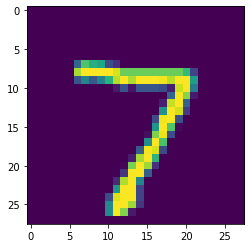

In [4]:
print(y[0])
plt.imshow(x[0])

In [5]:
import PIL

In [6]:
test_sample = np.zeros(shape=(28, 28, 1))

indices = [0, 6, 99, 199, 77, 87, 2347, 249]

selected_samples = x[indices,:,:,:]


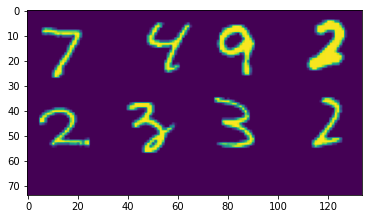

In [7]:
test = np.concatenate((x[indices[0]], np.zeros(shape=(28, 14, 1))), axis=1)
test = np.concatenate((test, x[indices[1]]), axis=1)
test = np.concatenate((test, x[indices[2]]), axis=1)
test = np.concatenate((test, np.zeros(shape=(28, 8, 1))), axis=1)
test = np.concatenate((test, x[indices[3]]), axis=1)

test = np.concatenate((test, np.zeros(shape=(4, 14+4*28+8, 1))), axis=0)

row = np.concatenate((x[indices[4]], np.zeros(shape=(28,7,1))), axis=1)
row = np.concatenate((row, x[indices[5]]), axis=1)
row = np.concatenate((row, np.zeros(shape=(28,7,1))), axis=1)
row = np.concatenate((row, x[indices[6]]), axis=1)
row = np.concatenate((row, np.zeros(shape=(28,8,1))), axis=1)
row = np.concatenate((row, x[indices[7]]), axis=1)

test = np.concatenate((test, row), axis=0)
test = np.concatenate((test, np.zeros(shape=(14, 134,1))), axis=0)

#test = test_sample

plt.imshow(test)

In [8]:
from keras.models import load_model, Model

from keras.layers import Input

from tensorflow.nn import softmax
from tensorflow.math import reduce_max, argmax
from tensorflow import cast

In [9]:
model = load_model("ext-fcnn")

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 1)]   0         
_________________________________________________________________
conv2d_layer_1 (Conv2D)      (None, None, None, 18)    468       
_________________________________________________________________
relu_layer_1 (Activation)    (None, None, None, 18)    0         
_________________________________________________________________
maxpool_layer_1 (MaxPooling2 (None, None, None, 18)    0         
_________________________________________________________________
conv2d_layer_2 (Conv2D)      (None, None, None, 48)    21648     
_________________________________________________________________
relu_layer_2 (Activation)    (None, None, None, 48)    0         
_________________________________________________________________
maxpool_layer_2 (MaxPooling2 (None, None, None, 48)    0     

In [11]:
sliced_model = Model(inputs=model.inputs, outputs=model.get_layer('conv2d_final').output)
prediction_slice = sliced_model.predict(np.expand_dims(test, 0))

In [12]:
print(prediction_slice.shape)
#print(prediction_slice)

(1, 6, 14, 10)


In [13]:
#res = argmax(softmax(prediction_slice, axis=-1), axis=-1)

res = softmax(prediction_slice, axis=-1)

res = cast(res > 0.95, res.dtype) * res

res = argmax(res, axis=-1)

print(res.shape)

(1, 6, 14)


tf.Tensor(
[[[7 0 0 0 4 4 1 4 0 9 0 0 0 2]
  [1 0 0 0 0 7 0 0 0 0 0 0 0 4]
  [1 0 0 0 1 0 0 0 2 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [2 0 0 0 3 4 0 0 3 3 0 0 0 2]
  [0 0 0 0 0 0 0 0 7 0 0 0 0 4]]], shape=(1, 6, 14), dtype=int64)


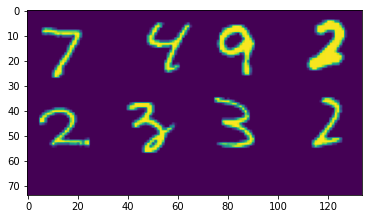

In [14]:
plt.imshow(res[0,:,:])
print(res)
plt.imshow(test)

In [15]:
argmax(model.predict(selected_samples), axis=-1)

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([7, 4, 9, 2, 2, 3, 3, 2], dtype=int64)>

In [16]:
from PIL import Image

(28, 41) 180 47


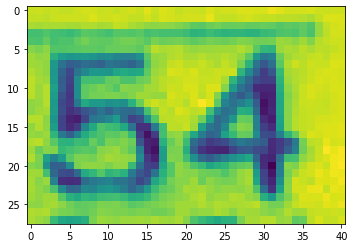

In [44]:
im = Image.open('data/custom/20211218_101106.jpg').convert('L')
sample = np.asarray(im) #/ 255.0 -0.5
#sample = np.expand_dims(sample, -1) 
#print(np.max(sample - np.mean(sample)) - np.min(sample - np.mean(sample)))
#sample = (sample - np.mean(sample)) / 255.0

print(sample.shape, np.max(sample), np.min(sample))
plt.imshow(sample[:,:])

In [18]:
#pred = model.predict(np.expand_dims(1 - sample[:,:,0] / np.max(sample), 0))
#print(pred)
#print(argmax(pred[0]), max(pred[0]))

In [19]:
#pred = model.predict(np.expand_dims(sample[:,:,0] / np.max(sample), 0))
#print(pred)
#print(argmax(pred[0]), max(pred[0]))

tf.Tensor([[[5 4]]], shape=(1, 1, 2), dtype=int64)


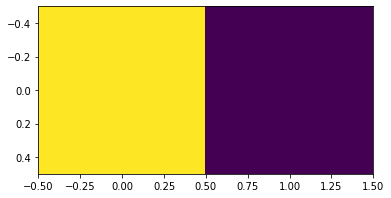

In [46]:
prediction_slice = sliced_model.predict(np.expand_dims(sample[:,:]/np.max(sample), 0))
prediction_slice.shape
res = softmax(prediction_slice, axis=-1)
res = cast(res > 0.05, res.dtype) * res
res = argmax(res, axis=-1)
plt.imshow(res[0,:,:])
print(res)

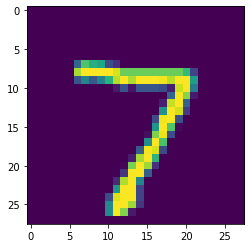

In [21]:
inverted_samples = 1-selected_samples / np.max(selected_samples)
plt.imshow(selected_samples[0,:,:,0])

In [22]:
argmax(model.predict(inverted_samples), axis=-1)

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([7, 4, 9, 2, 2, 3, 3, 2], dtype=int64)>

In [23]:
argmax(model.predict(selected_samples), axis=-1)

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([7, 4, 9, 2, 2, 3, 3, 2], dtype=int64)>